# Iris Flower Classification

In [ ]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Data Visualization and Analysis

In [ ]:
# check for missing values
print(iris.isnull().sum())

# check for noisy data
print(iris.describe())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


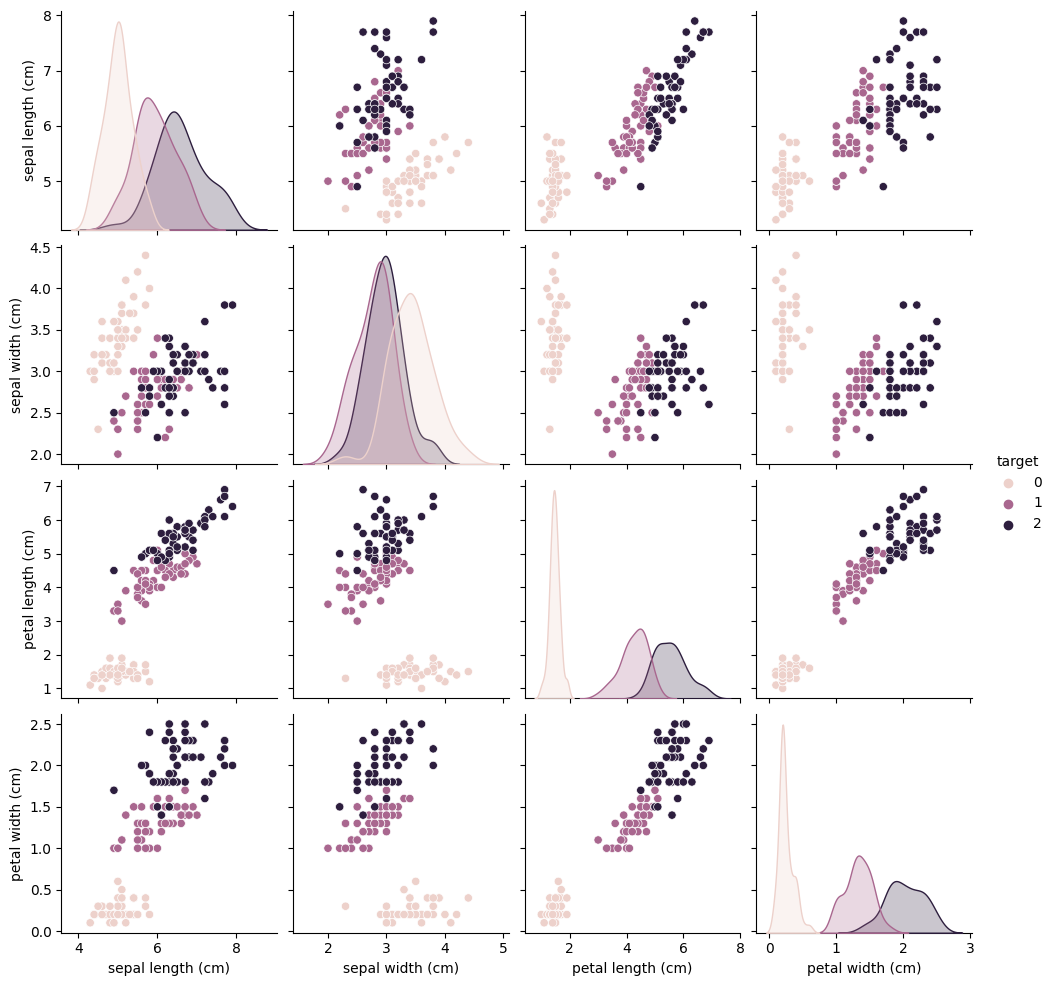

In [ ]:
# Visualize the whole dataset
sns.pairplot(iris_df, hue='target')

# Scatter Plot

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


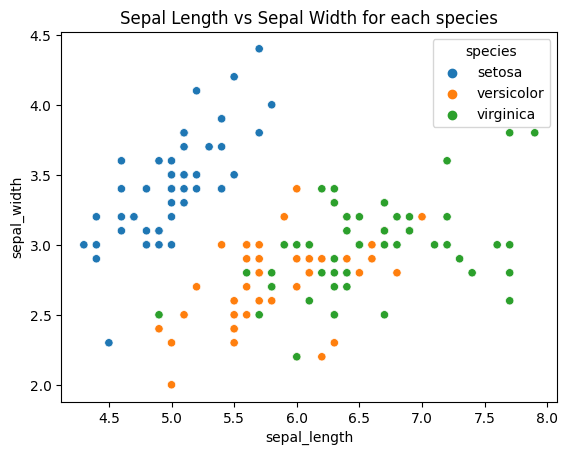

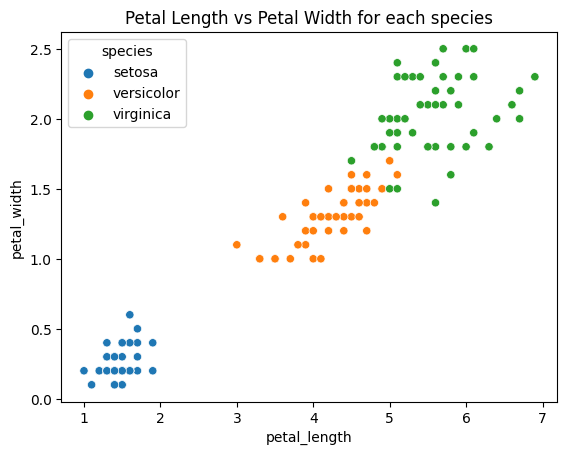

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

# Convert to pandas dataframe
df = sns.load_dataset("iris")

# Preview the first 5 rows of the dataframe
print(df.head())

# Plot a scatterplot of sepal_length vs sepal_width for each species
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species")
plt.title("Sepal Length vs Sepal Width for each species")
plt.show()

# Plot a scatterplot of petal_length vs petal_width for each species
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species")
plt.title("Petal Length vs Petal Width for each species")
plt.show()


# Histogram

<Axes: xlabel='sepal_length', ylabel='Count'>

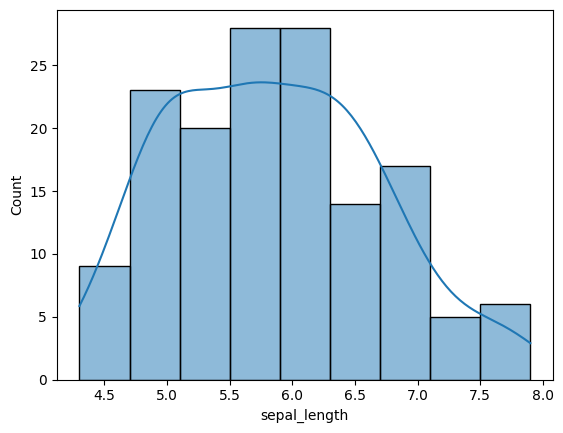

In [ ]:
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create histogram plot for Sepal Length
sns.histplot(data=iris, x="sepal_length", kde=True)


## Box Plot of 3 species of Iris

<Axes: xlabel='target', ylabel='petal length (cm)'>

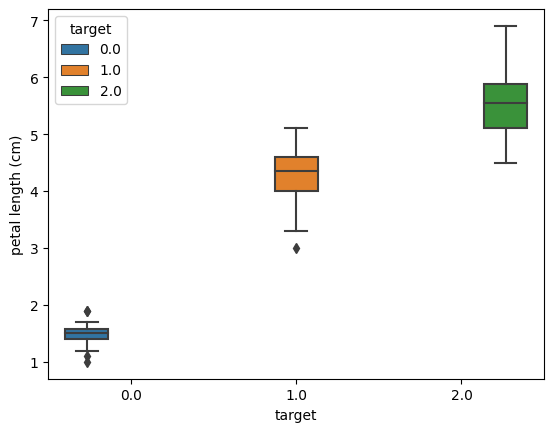

In [ ]:
sns.boxplot(x="target", y="petal length (cm)", data=iris_df, hue='target')

In [ ]:
# Splitting into Training and Testing set

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Seperating the data into dependent and independent variables
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 1. K-Nearest Neighbors (KNN)
### KNN is a non-parametric algorithm that classifies new data points based on their proximity to existing data points in a training set.

Accuracy: 0.6666666666666666
Confusion matrix:
[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]


<ipython-input-27-76197f534897>:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


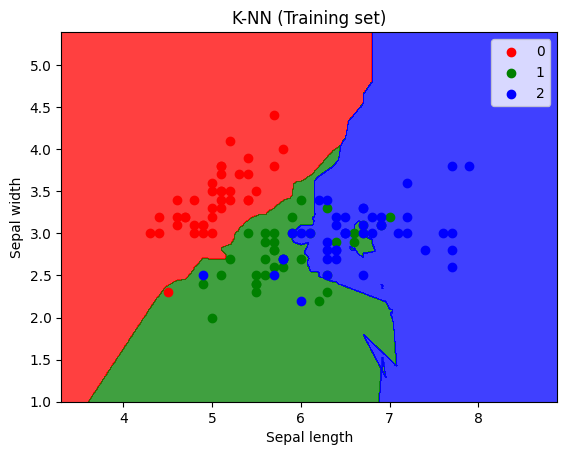

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We will only use the first two features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the KNN classifier with k=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the accuracy and print the confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Confusion matrix:\n{cm}")

# Plot the decision boundary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('K-NN (Training set)')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


# 2. Decision Tree
###A decision tree is a flowchart-like model that makes predictions based on a series of decisions about the features of a given data point.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy: 1.0


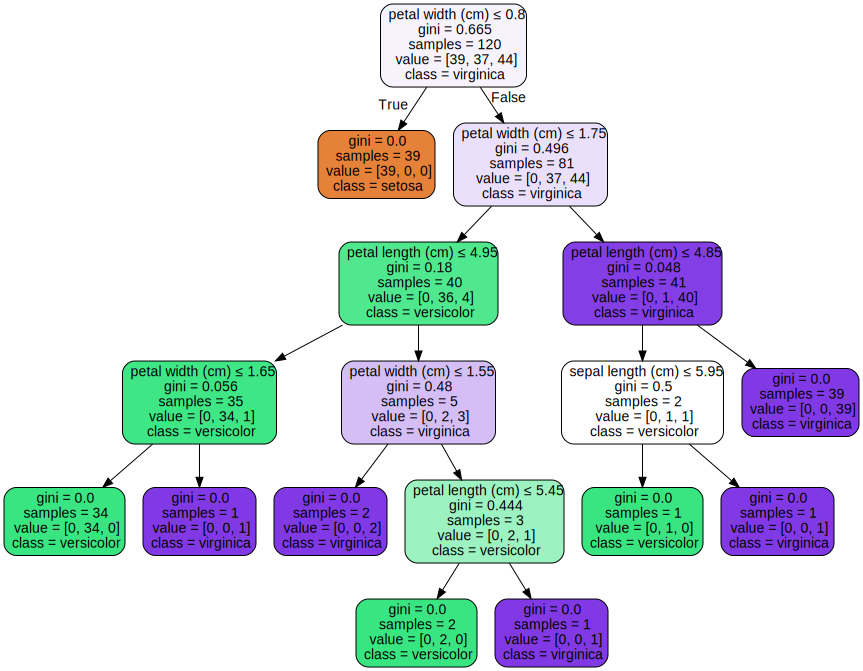

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import graphviz

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Visualize the decision tree
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")
graph


#3. Random Forest
### Random Forest is an ensemble algorithm that builds multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


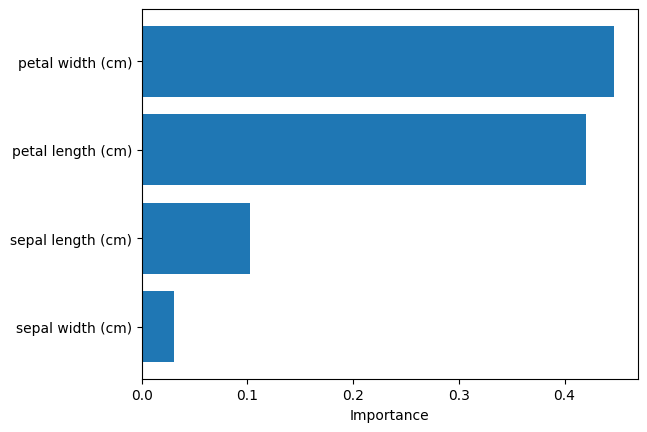

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Splitting the data into dependent and independent variables
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize feature importance
feature_names = iris['feature_names']
feature_importances = rf_classifier.feature_importances_
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.show()


# 4. Naive Bayes
### Naive Bayes is a probabilistic algorithm that calculates the probability of a given data point belonging to a certain class based on its feature values.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


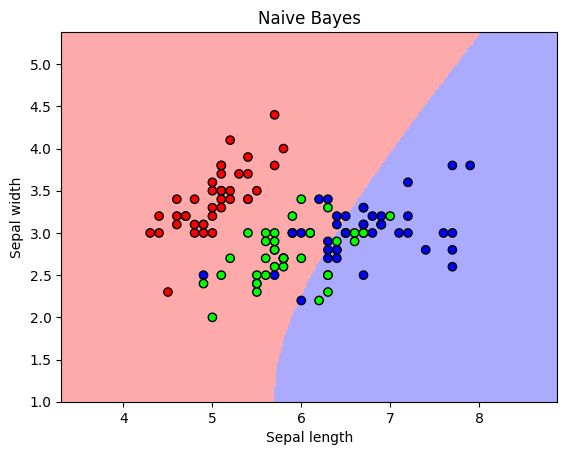

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Define variables
h = 0.02  # step size in the mesh
X = X_train[:, :2]
y = y_train

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot decision boundary
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Naive Bayes")

plt.show()


# 5. Logistic Regression
### Logistic regression is a binary classification algorithm that uses a logistic function to model the probability of a data point belonging to a certain class.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



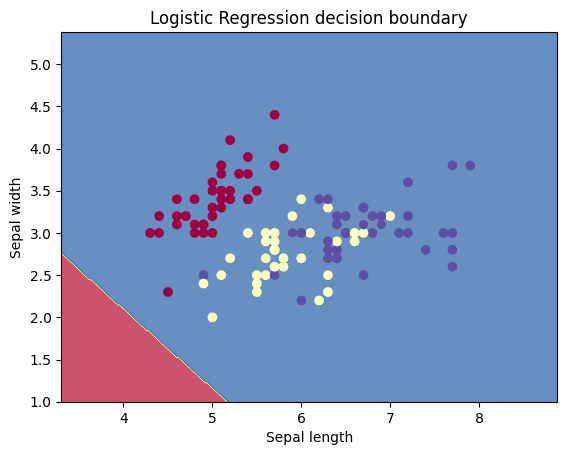

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Split dataset into dependent and independent variables
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit logistic regression model
classifier = LogisticRegression(random_state=0, max_iter = 1000)
classifier.fit(X_train, y_train)

# Predict test set results and generate classification report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Create meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic Regression decision boundary')
plt.show()



# 6.Support Vector Machines (SVM)
### SVM is a powerful algorithm for both classification and regression that separates data points into different classes by finding the optimal hyperplane that maximizes the margin between them.

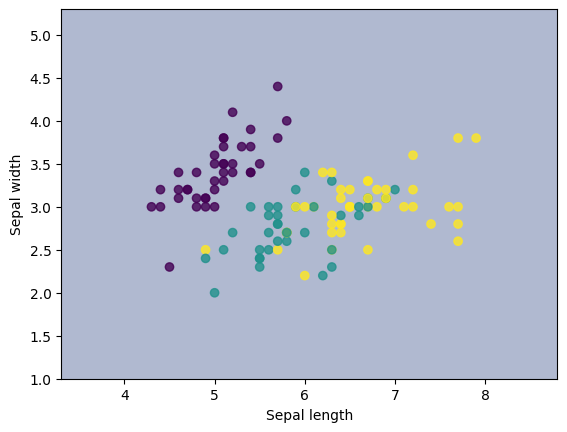

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [ ]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

# Create a mesh grid for plotting decision regions
xx, yy = np.meshgrid(np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.1),
                     np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.1))
# Stack the coordinates of the mesh grid points into a single 2D array
mesh_grid = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]

# Make predictions on the mesh grid
Z = classifier.predict(mesh_grid)
Z = Z.reshape(xx.shape)

# Plot the decision regions and data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Summary of the predictions made by the classifier
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))


# 7. Gradient Boosting
### Gradient boosting is an ensemble algorithm that builds multiple decision trees in a sequential manner and optimizes the loss function at each step.

Accuracy score: 1.0


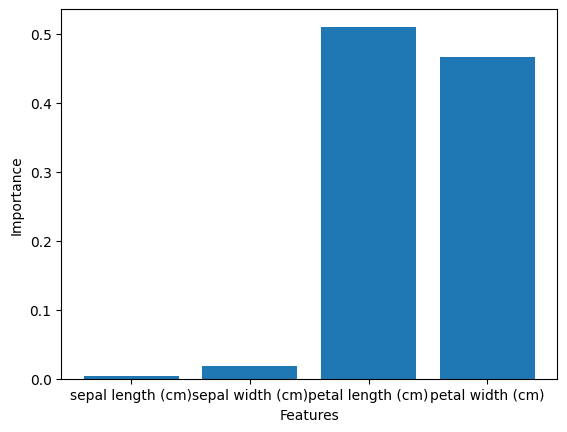

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-1], iris_df.iloc[:, -1], test_size=0.3, random_state=42)

# Fit Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict on test set
y_pred = gb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

# Plot feature importances
feature_importances = gb.feature_importances_
plt.bar(iris_df.columns[:-1], feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# 8. Artificial Neural Networks (ANN)
### ANN is a machine learning model that mimics the structure and function of the human brain, consisting of interconnected nodes or neurons that process and transmit information.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


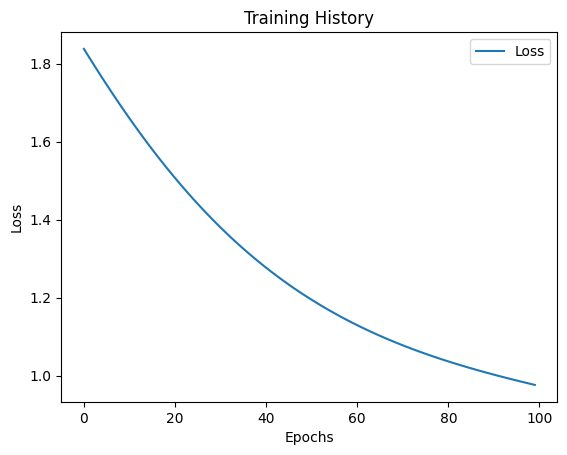

Test accuracy: 0.4


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()

# Convert iris dataset to pandas dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Define ANN model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100, random_state=42)

# Train model
history = model.fit(X_train, y_train)

# Plot training history
plt.plot(history.loss_curve_, label='Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


# 9. Principal Component Analysis (PCA)
### PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining as much variance as possible.

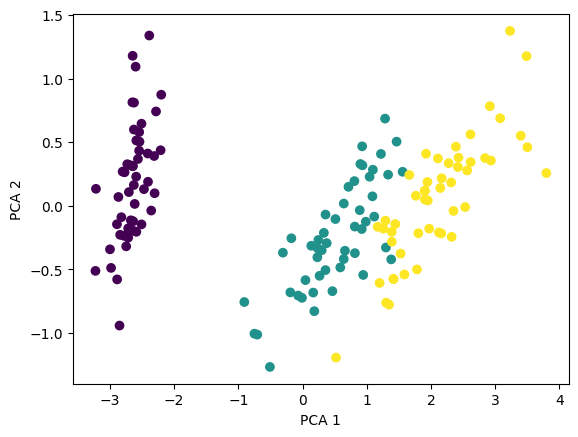

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Apply PCA transformation
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


# 10. Gaussian Mixture Models (GMM)
### GMM is a probabilistic clustering algorithm that models each cluster as a mixture of Gaussian distributions with unknown parameters.

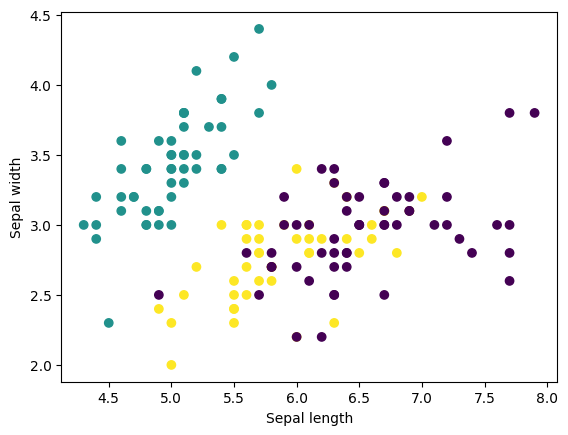

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Fit GMM model
gmm = GaussianMixture(n_components=3)
gmm.fit(iris_df)

# Plot the predicted clusters
import matplotlib.pyplot as plt
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=gmm.predict(iris_df))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
